# Dimensionality Reduction in Linear Regression

In [48]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

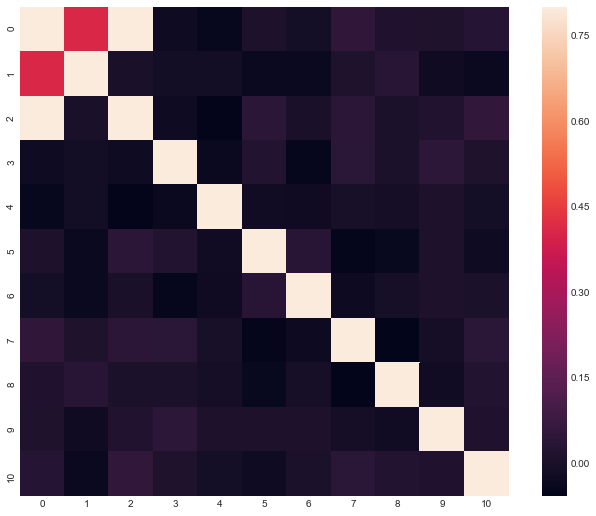

In [49]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8264357637677369
R-squared PLSR: 0.8264355877300349
Differenece:  1.7603770197105462e-07


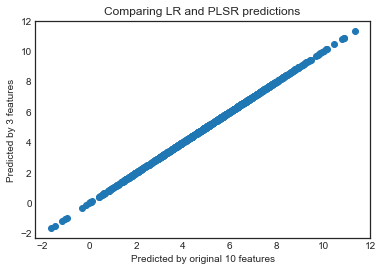

In [51]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

print('Differenece: ', regr.score(X, y) - pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

## Experiment with differenet values for n_components

R-squared regression: 0.8264357637677369
R-squared PLSR: 0.8264357637677365
Differenece:  3.3306690738754696e-16


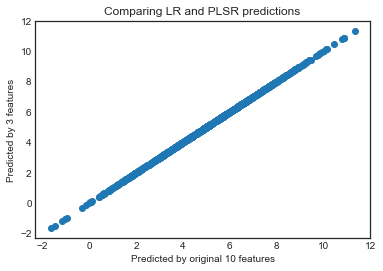

In [52]:
# Fit a linear model with all 10 features.
regr_2 = linear_model.LinearRegression()
regr_2.fit(X, y)

# Save predicted values.
Y_pred_2 = regr_2.predict(X)
print('R-squared regression:', regr_2.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1_2 = PLSRegression(n_components=6)

# Reduce X to R(X) and regress on y.
pls1_2.fit(X, y)

# Save predicted values.
Y_PLS_pred_2 = pls1_2.predict(X)
print('R-squared PLSR:', pls1_2.score(X, y))

print('Differenece: ', regr_2.score(X, y) - pls1_2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred_2,Y_PLS_pred_2) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### Difference between 3 and 6 componenets

In [53]:
pls1_2.score(X, y) -  pls1.score(X, y)

1.760377016379877e-07

Increasing the number of componenets seems to have increased the R-squared PLSR value

R-squared regression: 0.8264357637677369
R-squared PLSR: 0.8204746453105022
Differenece:  0.005961118457234682


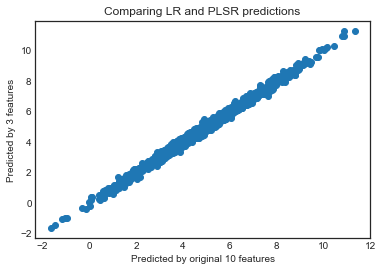

In [54]:
# Fit a linear model with all 10 features.
regr_3 = linear_model.LinearRegression()
regr_3.fit(X, y)

# Save predicted values.
Y_pred_3 = regr_3.predict(X)
print('R-squared regression:', regr_3.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1_3 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls1_3.fit(X, y)

# Save predicted values.
Y_PLS_pred_3 = pls1_3.predict(X)
print('R-squared PLSR:', pls1_3.score(X, y))

print('Differenece: ', regr_3.score(X, y) - pls1_3.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred_3,Y_PLS_pred_3) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### Difference between 3 and 6 componenets

In [55]:
pls1_3.score(X, y) - pls1.score(X, y)

-0.005960942419532711

Decreasing the number of componenets seems to have decreased the R-squared PLSR value